##Playing around with [torch-dreams](https://github.com/Mayukhdeb/torch-dreams)

This simple library was heavily inspired from: [Feature Visualization: How neural networks build up their understanding of images](https://distill.pub/2017/feature-visualization/)

torch_dreams aims to be something like [tensorflow/lucid](https://github.com/tensorflow/lucid) but in PyTorch in order to facilitate research in neural network interpretability

In [ ]:
# !pip install torch-dreams  ## not yet, will make a new release soon!
!pip install git+https://github.com/Mayukhdeb/torch-dreams

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch_dreams.dreamer import dreamer
import torchvision.models as models

In [ ]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

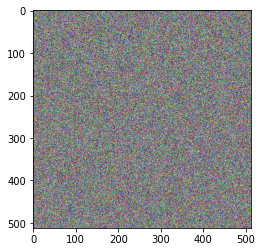

True

In [5]:
image_sample = (np.random.rand(512,512,3).astype(np.float32) *255).astype(np.uint8)
plt.imshow(image_sample)
plt.show()
cv2.imwrite("noise.jpg", image_sample)

In [69]:
layers_to_use = [
                 model.Mixed_6c.branch7x7_1.conv,
                 model.Mixed_6b.branch7x7dbl_2
            ]

In [68]:
def custom_func_1(layer_outputs):
    loss = layer_outputs[0][74].mean() 
    return loss

def custom_func_2(layer_outputs):
    loss = layer_outputs[1][88].mean()
    return loss

In [72]:
config = {
    "image_path": "noise.jpg",
    "layers": layers_to_use,
    "octave_scale": 1.1,  ## 1.1
    "num_octaves": 20,  ## 14
    "iterations": 100,   ## 100
    "lr": 0.04, ## 0.05
    "max_rotation": 0.7,
}

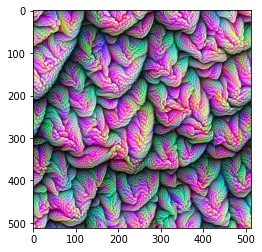

In [26]:
config["custom_func"] = custom_func_1
out_1 = dreamy_boi.deep_dream(config)
plt.imshow(out_1)
plt.show()

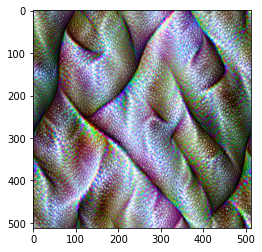

In [77]:
config["custom_func"] = custom_func_2
out_2 = dreamy_boi.deep_dream(config)
plt.imshow(out_2)
plt.show()

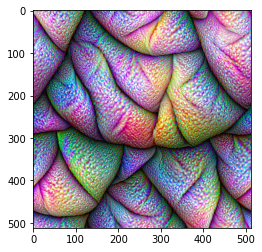

In [78]:
def custom_func_combined(layer_outputs):
    loss = layer_outputs[0][74].mean() + layer_outputs[1][88].mean()
    return loss
    
config["custom_func"] = custom_func_combined
out_blend = dreamy_boi.deep_dream(config)
plt.imshow(out_blend)
plt.show()

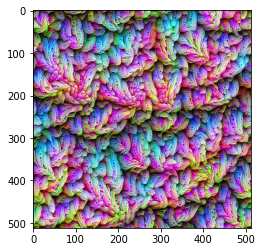

In [87]:
def custom_func_diff(layer_outputs):
    loss = layer_outputs[0][74].mean() - layer_outputs[1][88].mean()
    return loss

config["custom_func"] = custom_func_diff
out_diff = dreamy_boi.deep_dream(config)
plt.imshow(out_diff)
plt.show()

## Extras 

In [103]:
def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[0][channel_number].mean()
        return loss
    return custom_func

c1 = make_custom_func(layer_number = 0, channel_number = 7)

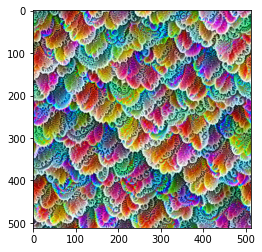

In [106]:
config["custom_func"] = c1
out_4 = dreamy_boi.deep_dream(config)
plt.imshow(out_4)
plt.show()

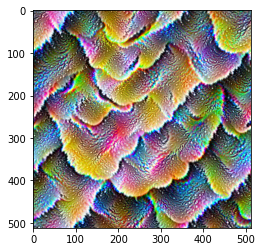

In [105]:
def custom_func_add(layer_outputs):
    loss = layer_outputs[0][7].mean() + layer_outputs[1][88].mean()*0.2
    return loss

config["custom_func"] = custom_func_add
out_add_2 = dreamy_boi.deep_dream(config)
plt.imshow(out_add_2)
plt.show()

In [107]:
outs = [out_1, out_2, out_blend, out_diff, out_4, out_add_2 ]
for i in range(len(outs)):
    name = "out_" + str(i) + ".jpg"
    out_p = cv2.cvtColor((outs[i]*255), cv2.COLOR_BGR2RGB)
    cv2.imwrite(name, out_p)